# **4. Exploratory Data Analysis**

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## **0. 라이브러리 준비**

In [1]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## 데이터 불러오기

titanic_df = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/EDA/Titanic Data/train.csv")

## **1. 분석의 목적과 변수 확인**

* 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [3]:
## 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## **2. 데이터 전체적으로 살펴보기**

In [5]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe()  # 수치형 데이터에 대한 요약만을 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## 상관계수 확인

titanic_df.corr()

# Correlation is NOT Causation

# 상관성 : A up, B up, ...
# 인과성 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
## 결측치 확인

titanic_df.isnull().sum()

# Age, Cabin, Embarked에서 결측치 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **3. 데이터의 개별 속성 파악하기**

### **I. Survived Column**

In [8]:
## 생존자, 사망자 명수는?

# titanic_df['Survived'].sum()
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

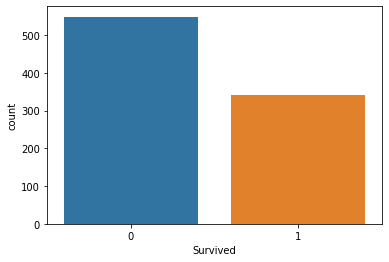

In [9]:
## 생존자 수와 사망자 수를 Barplot으로 그려보기 : sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### **II. Pclass**

In [10]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
# 생존 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

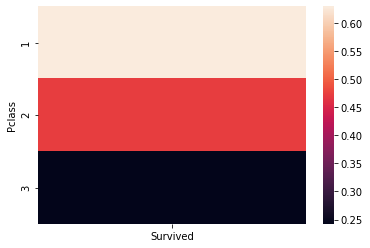

In [13]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

### **III. Sex**

In [14]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

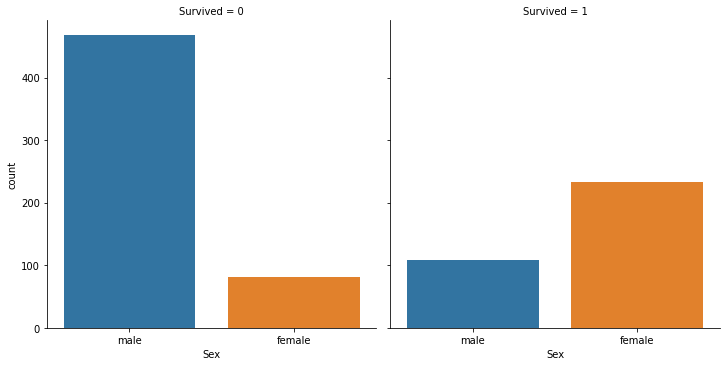

In [15]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### **IV. Age**

* Remind : 결측치 존재!

In [16]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
# titanic_df[titanic_df.Survived == 1]
titanic_df[titanic_df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

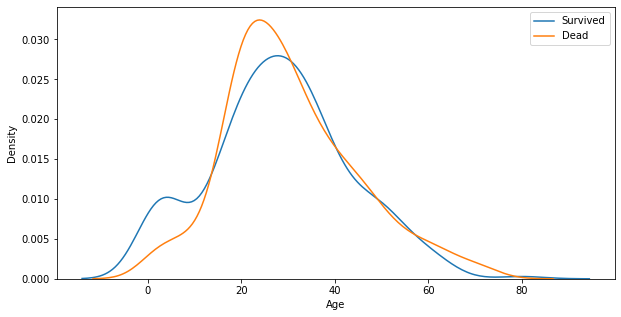

In [18]:
## Survived 1, 0과 Age의 경향성

# figure -> axis -> plot

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

### **Appendix I. Sex + Pclass vs. Survived**

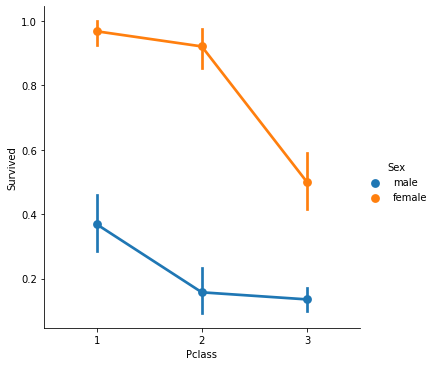

In [19]:
# sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)

plt.show()

### **Appendix II. Age + Pclass**

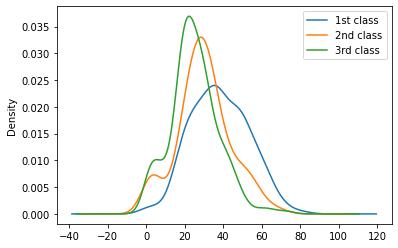

In [20]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])

plt.show()

## **Mission** : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [21]:
## 각 선착장 탑승자 수 비교 : 결측치 존재!
## C = Cherbourg, Q = Queenstown, S = Southampton

titanic_df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

* 절반 이상의 탑승자가 `S` 선착장에서 탑승했다.
* 빠진 두 개의 데이터 또한 `S`의 값을 가질 확률이 높으므로 `NaN`을 `S`로 대체한다.

In [22]:
## NaN -> S

titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

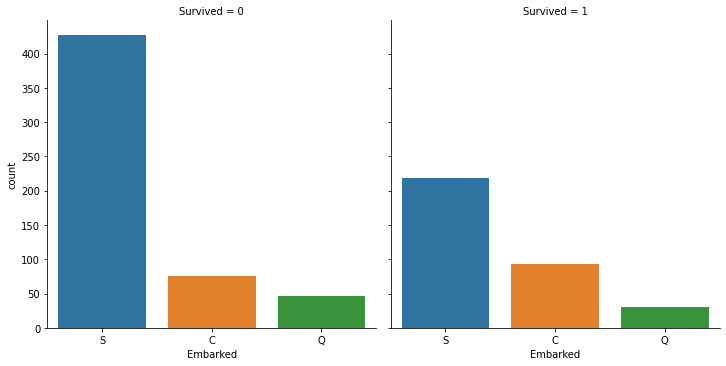

In [23]:
## 각 선착장 생존자 수 비교 그래프

sns.catplot(x='Embarked', col='Survived', kind='count', data=titanic_df)
plt.show()

* `S` 선착장에서 탑승한 인원이 워낙 많기 때문에(절반 이상) 생존자 수 그래프로는 `S` 선착장의 생존율이 높다고 판단하기 어렵다.

[]

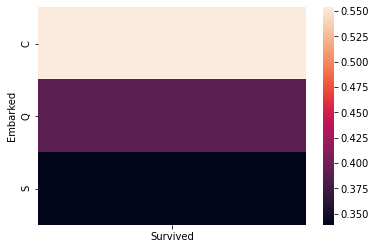

In [24]:
## 각 선착장 생존율 그래프

sns.heatmap(titanic_df[['Embarked', 'Survived']].groupby(['Embarked']).mean())
plt.plot()

* `S` 선착장의 생존자 수가 제일 많지만, 생존율은 `C` 선착장이 높다.

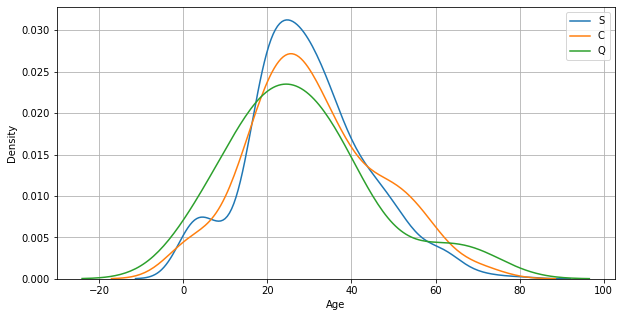

In [25]:
## 각 선착장 나이 비교

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Embarked == 'S']['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Embarked == 'C']['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Embarked == 'Q']['Age'], ax=ax)

plt.grid()
plt.legend(['S', 'C', 'Q'])

plt.show()

* 모든 선착장에서 20~40대가 제일 많으며, 눈에 띄는 특이점은 없다.

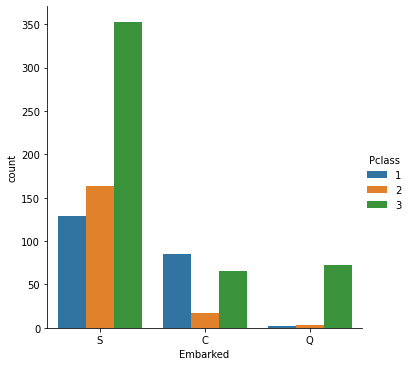

In [26]:
## 각 선착장 등급별 승객 수 비교

sns.catplot(x='Embarked', hue='Pclass', kind='count', data=titanic_df)
plt.show()

* `S` 선착장과 `Q` 선착장은 **삼등석** 수가 제일 많고 이등석, 일등석 순이지만  
  `C` 선착장은 **일등석** 수가 제일 많고 삼등석, 이등석 순이다.

[]

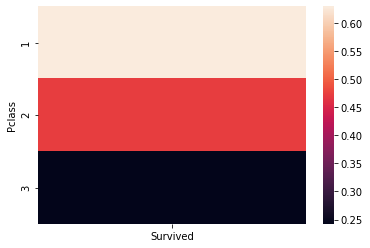

In [27]:
## 히트맵 활용 : 각 좌석 등급의 생존율

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

* 앞서 분석했듯이 좌석의 등급이 높을수록 생존율이 높다.
* `C` 선착장의 생존율이 높은 건 삼등석보다 일등석 승객이 많았기 때문이라고 볼 수 있다.

In [28]:
## 각 좌석의 평균 가격

titanic_df[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


* 좌석의 등급이 높을수록 티켓의 가격이 비싸다고 추측할 수 있다.

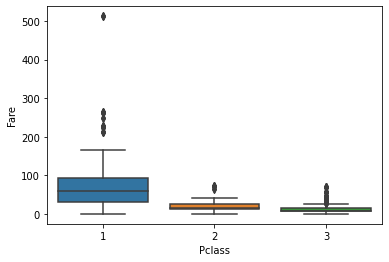

In [29]:
## 티켓 가격에 대한 상자 그림

sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.show()

* 평균을 통해 추측했던 것처럼 일등석의 가격이 대체로 비싸다고 볼 수 있다.
* 하지만 일등석 내에서도 티켓 가격의 차이가 다른 등급에 비해 크다는 걸 알 수 있다.
    * 일등석 내에서도 등급이 나뉘어 있을 가능성이 있다.

### 2. [kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### 막무가내로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.
    - 각 데이터는 어떤 자료형을 가지고 있나요?
    - 데이터에 **결측치**는 없나요? → 있다면 이를 어떻게 메꿔줄까요?
    - 데이터의 자료형을 바꿔줄 필요가 있나요? → 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험으로 도출되어도 상관이 없습니다.
    - 가설은 명확할수록 좋습니다. ex) *Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!*
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야 합니다.
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두 개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠? [링크 텍스트](https://)